In [1]:
# Supressing the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries and packages.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Importing the dataset from the working directory.

df = pd.read_csv('train.csv')
df.head(10)

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1
5,CR_96263,07-APR-03,0,45,45,10,3,1,0,1,6,1,303,1.0,72,62,34,1
6,CR_131400,22-JAN-08,0,30,35,7,3,7,1,0,5,1,174,0.0,112,29,43,1
7,CR_11981,14-MAY-93,0,8,7,7,3,9,8,0,5,1,316,1.0,72,62,34,1
8,CR_184134,21-AUG-16,0,49,49,6,5,8,3,1,1,1,316,1.0,103,14,34,1
9,CR_32634,25-AUG-96,1,4,4,6,5,15,10,0,5,2,145,1.0,103,29,34,0


In [4]:
# Looking at the dimensions of the dataframe.

df.shape

(23856, 18)

In [5]:
# Looking at the datatypes of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [6]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [7]:
# Looking at the statistical aspects of the dataframe.

df.describe(percentiles=[.05, .25, .5, .75, .90, .95, .99]).round(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.00,23856.00,23856.00,23856.00,23856.00,23856.00,23856.00,23856.00,23856.00,23856.00,23856.00,23674.00,23856.00,23856.00,23856.00,23856.00
mean,0.48,24.79,24.64,4.28,2.46,6.15,4.88,0.97,4.92,1.24,206.95,0.97,85.24,72.67,33.46,0.96
std,1.44,15.24,15.14,2.94,1.96,4.47,3.88,1.45,1.36,1.12,93.03,1.17,27.60,43.30,8.39,0.21
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
5%,0.00,4.00,4.00,0.00,0.00,1.00,0.00,0.00,2.00,1.00,0.00,0.00,18.00,29.00,23.00,1.00
25%,0.00,7.00,8.00,2.00,1.00,3.00,2.00,0.00,5.00,1.00,174.00,1.00,72.00,29.00,34.00,1.00
50%,0.00,24.00,24.00,4.00,3.00,5.00,4.00,1.00,5.00,1.00,249.00,1.00,98.00,62.00,34.00,1.00
75%,0.00,36.00,35.00,6.00,5.00,8.00,7.00,1.00,6.00,1.00,249.00,1.00,103.00,107.00,34.00,1.00
90%,1.00,45.00,45.00,9.00,5.00,15.00,10.00,2.00,6.00,2.00,316.00,2.00,112.00,142.00,43.00,1.00
95%,3.00,49.00,49.00,10.00,5.00,15.00,12.00,3.00,6.00,2.00,316.00,2.00,112.00,142.00,46.00,1.00


In [8]:
# Looking at the count and percentages of null values of each column.

total = df.isnull().sum().sort_values(ascending = False)

percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)

pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])

,Total,Percentage
X_12,182,0.762911
MULTIPLE_OFFENSE,0,0.000000
X_6,0,0.000000
DATE,0,0.000000
X_1,0,0.000000
X_2,0,0.000000
X_3,0,0.000000
X_4,0,0.000000
X_5,0,0.000000
X_7,0,0.000000


In [9]:
df['X_12'].value_counts()

1.0     15674
0.0      5171
2.0      2039
3.0       476
4.0       176
5.0        59
6.0        36
8.0         9
10.0        7
9.0         6
7.0         4
11.0        4
15.0        2
20.0        2
17.0        1
58.0        1
50.0        1
40.0        1
16.0        1
90.0        1
12.0        1
30.0        1
14.0        1
Name: X_12, dtype: int64

In [11]:
df['X_12']=df['X_12'].fillna(1.0)

In [12]:
# Looking at the count and percentages of null values of each column.

total = df.isnull().sum().sort_values(ascending = False)

percentage = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)

pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])

,Total,Percentage
MULTIPLE_OFFENSE,0,0.0
X_15,0,0.0
DATE,0,0.0
X_1,0,0.0
X_2,0,0.0
X_3,0,0.0
X_4,0,0.0
X_5,0,0.0
X_6,0,0.0
X_7,0,0.0


In [14]:
# Looking at the percentage shares of both the classes in the dataset.

offense = df['MULTIPLE_OFFENSE'].value_counts()
Not_Hack = offense[0] / df['MULTIPLE_OFFENSE'].count() * 100
Hack = offense[1] / df['MULTIPLE_OFFENSE'].count() * 100

print('MULTIPLE_OFFENSE')

print('Percentage share of non-hack:', round(Not_Hack, 2))

print('Percentage share of hack:' , round(Hack, 2))

MULTIPLE_OFFENSE
Percentage share of non-hack: 4.48
Percentage share of hack: 95.52


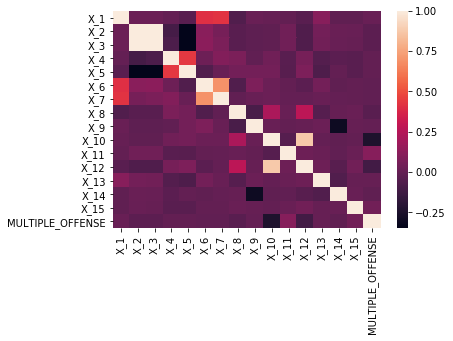

In [16]:
sns.heatmap(df.corr())

In [17]:
df.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.021999,0.022603,0.002137,-0.034220,0.409876,0.421454,-0.061897,0.017984,0.004155,-0.003078,-0.034565,0.111611,-0.012708,-0.012132,0.014034
X_2,0.021999,1.000000,0.996985,-0.104321,-0.349190,0.119718,0.058806,-0.038174,-0.017749,-0.016710,0.038003,-0.067504,0.046668,0.015194,0.013822,-0.027293
X_3,0.022603,0.996985,1.000000,-0.075344,-0.347519,0.124662,0.072954,-0.033035,-0.019853,-0.014485,0.036946,-0.064693,0.043201,0.013522,0.006851,-0.027218
X_4,0.002137,-0.104321,-0.075344,1.000000,0.439616,0.028929,0.094076,0.075197,-0.008453,0.038077,-0.037614,0.058949,-0.051861,-0.030024,-0.033198,-0.002921
X_5,-0.034220,-0.349190,-0.347519,0.439616,1.000000,-0.062784,0.010161,0.046926,0.046428,0.046212,-0.043111,0.081794,-0.071233,-0.003413,-0.036383,-0.003450
X_6,0.409876,0.119718,0.124662,0.028929,-0.062784,1.000000,0.695243,-0.063541,0.079192,0.021186,-0.002990,-0.031158,0.047845,-0.013155,-0.006621,-0.007903
X_7,0.421454,0.058806,0.072954,0.094076,0.010161,0.695243,1.000000,-0.011824,0.011519,0.023205,0.002970,-0.000435,0.012204,0.003738,-0.003277,-0.008036
X_8,-0.061897,-0.038174,-0.033035,0.075197,0.046926,-0.063541,-0.011824,1.000000,-0.090184,0.222004,0.009424,0.272791,-0.048140,0.003987,0.017636,-0.033397
X_9,0.017984,-0.017749,-0.019853,-0.008453,0.046428,0.079192,0.011519,-0.090184,1.000000,0.013388,-0.006152,0.005142,0.023537,-0.297295,0.006475,-0.000748
X_10,0.004155,-0.016710,-0.014485,0.038077,0.046212,0.021186,0.023205,0.222004,0.013388,1.000000,-0.045596,0.877434,0.002332,-0.016519,-0.003336,-0.242596


<Figure size 432x288 with 0 Axes>

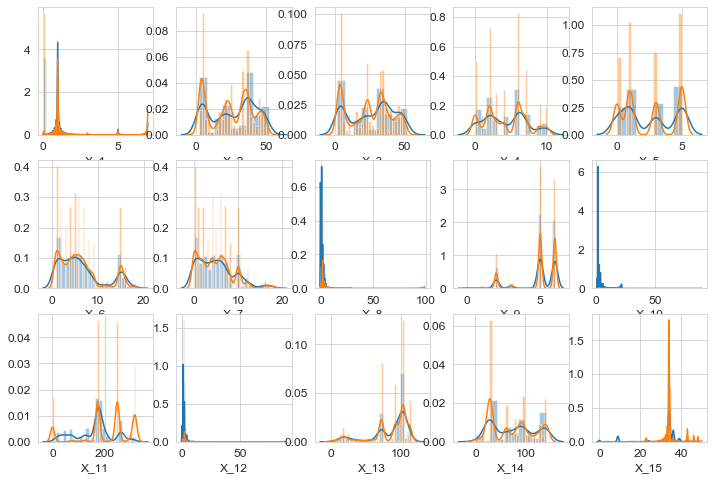

In [76]:
# plotting the histogram of the variables from the dataset to check the skewness.

var = ['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']

i = 0
t0 = df.loc[df['MULTIPLE_OFFENSE'] == 0]
t1 = df.loc[df['MULTIPLE_OFFENSE'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,5, figsize = (12,8))

for feature in var:
    i += 1
    plt.subplot(3,5,i)
    sns.distplot(t0[feature], label="MULTIPLE_OFFENSE = 0")
    sns.distplot(t1[feature], label="MULTIPLE_OFFENSE = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [77]:
data=df[['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']]
data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [78]:
scaler=StandardScaler()
data_scl=scaler.fit_transform(data)
data_scl[:10]

array([[-0.33602492,  0.73548947,  0.61861178, -0.77319018, -0.74150225,
        -0.25810872,  0.28942158,  0.01895257,  0.78957509, -0.21871449,
        -0.35423007,  0.02212593,  0.24505213, -1.00872781,  0.30229601],
       [ 0.35856051,  0.80110665,  0.81683078, -1.45239719, -1.2509127 ,
         1.08367417,  3.12312251,  0.01895257,  0.78957509, -0.21871449,
         0.3122116 ,  0.02212593,  0.64365126,  1.60118818,  0.06382199],
       [-0.33602492, -1.42987743, -1.4957242 , -0.43358667,  1.29613953,
        -1.15263065, -1.25623348,  0.70712981, -1.41210456, -0.21871449,
        -0.35423007,  0.02212593,  0.89730526,  0.46945469,  0.06382199],
       [-0.33602492,  0.53863793,  0.48646578, -0.77319018, -0.74150225,
         0.18915224, -0.9986243 ,  0.01895257,  0.78957509, -0.21871449,
         0.45194936,  0.02212593, -0.47967357, -1.00872781,  0.06382199],
       [-0.33602492,  0.53863793,  0.48646578, -0.77319018, -0.74150225,
         0.41278272, -0.48340595, -0.66922468, 

In [79]:
data_scl=pd.DataFrame(data_scl,columns=data.columns)
data_scl.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.336025,0.735489,0.618612,-0.773190,-0.741502,-0.258109,0.289422,0.018953,0.789575,-0.218714,-0.354230,0.022126,0.245052,-1.008728,0.302296
1,0.358561,0.801107,0.816831,-1.452397,-1.250913,1.083674,3.123123,0.018953,0.789575,-0.218714,0.312212,0.022126,0.643651,1.601188,0.063822
2,-0.336025,-1.429877,-1.495724,-0.433587,1.296140,-1.152631,-1.256233,0.707130,-1.412105,-0.218714,-0.354230,0.022126,0.897305,0.469455,0.063822
3,-0.336025,0.538638,0.486466,-0.773190,-0.741502,0.189152,-0.998624,0.018953,0.789575,-0.218714,0.451949,0.022126,-0.479674,-1.008728,0.063822
4,-0.336025,0.538638,0.486466,-0.773190,-0.741502,0.412783,-0.483406,-0.669225,0.055682,-0.218714,-0.354230,-0.837542,0.969778,-1.008728,1.136955


In [80]:
# Checking the skewness in all the other numerical features.

from scipy.stats import skew
skewed_feats = data_scl.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features':skewed_feats})
skewness

,Skewed Features
X_10,34.940516
X_12,30.733923
X_8,17.702736
X_1,3.789069
X_6,0.960769
X_7,0.796118
X_14,0.245572
X_4,0.183382
X_5,0.175220
X_3,-0.082115


In [81]:
# Filtering out the features where skewness is more than 1 or less than -1.

skewed_feats1 = skewed_feats[skewed_feats > 1]
skewed_feats1 = skewed_feats1.index

skewed_feats2 = skewed_feats[skewed_feats < -1]
skewed_feats2 = skewed_feats2.index

In [82]:
skewed_feats1

Index(['X_10', 'X_12', 'X_8', 'X_1'], dtype='object')

In [83]:
skewed_feats2

Index(['X_13', 'X_9', 'X_15'], dtype='object')

In [84]:
# Converting the skewed numerical features into log scale. Here a constant '150' is added to facilitate the log transformation
# of negative values.

data_scl[skewed_feats1] = np.log1p(data_scl[skewed_feats1] + 150)

data_scl[skewed_feats2] = np.log1p(data_scl[skewed_feats2] + 150)

In [85]:
data_scl.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,5.015052,0.735489,0.618612,-0.773190,-0.741502,-0.258109,0.289422,5.017405,5.022495,5.01583,-0.354230,5.017426,5.018901,-1.008728,5.019280
1,5.019652,0.801107,0.816831,-1.452397,-1.250913,1.083674,3.123123,5.017405,5.022495,5.01583,0.312212,5.017426,5.021533,1.601188,5.017702
2,5.015052,-1.429877,-1.495724,-0.433587,1.296140,-1.152631,-1.256233,5.021952,5.007884,5.01583,-0.354230,5.017426,5.023205,0.469455,5.017702
3,5.015052,0.538638,0.486466,-0.773190,-0.741502,0.189152,-0.998624,5.017405,5.022495,5.01583,0.451949,5.017426,5.014098,-1.008728,5.017702
4,5.015052,0.538638,0.486466,-0.773190,-0.741502,0.412783,-0.483406,5.012838,5.017649,5.01583,-0.354230,5.011718,5.023682,-1.008728,5.024781


In [86]:
data_hk=pd.concat([data_scl,df['MULTIPLE_OFFENSE']],axis=1)
data_hk.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,5.015052,0.735489,0.618612,-0.773190,-0.741502,-0.258109,0.289422,5.017405,5.022495,5.01583,-0.354230,5.017426,5.018901,-1.008728,5.019280,0
1,5.019652,0.801107,0.816831,-1.452397,-1.250913,1.083674,3.123123,5.017405,5.022495,5.01583,0.312212,5.017426,5.021533,1.601188,5.017702,1
2,5.015052,-1.429877,-1.495724,-0.433587,1.296140,-1.152631,-1.256233,5.021952,5.007884,5.01583,-0.354230,5.017426,5.023205,0.469455,5.017702,1
3,5.015052,0.538638,0.486466,-0.773190,-0.741502,0.189152,-0.998624,5.017405,5.022495,5.01583,0.451949,5.017426,5.014098,-1.008728,5.017702,1
4,5.015052,0.538638,0.486466,-0.773190,-0.741502,0.412783,-0.483406,5.012838,5.017649,5.01583,-0.354230,5.011718,5.023682,-1.008728,5.024781,1


<Figure size 432x288 with 0 Axes>

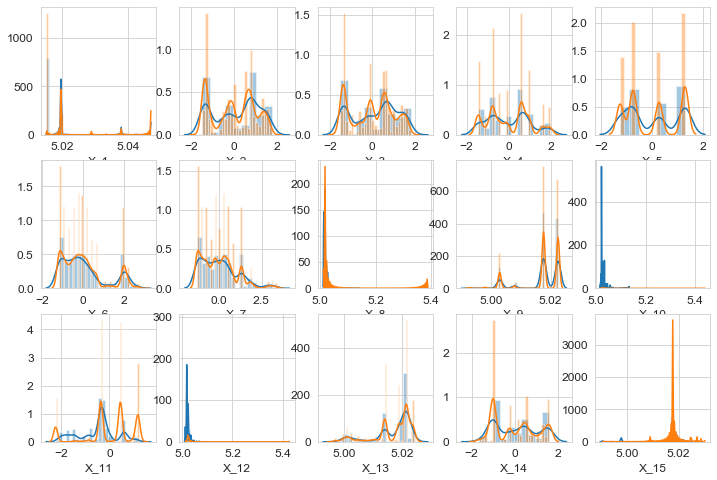

In [87]:
# plotting the histogram of the variables from the dataset to check the skewness.

var = ['X_1','X_2','X_3','X_4','X_5','X_6','X_7','X_8','X_9','X_10','X_11','X_12','X_13','X_14','X_15']

i = 0
t0 = data_hk.loc[data_hk['MULTIPLE_OFFENSE'] == 0]
t1 = data_hk.loc[data_hk['MULTIPLE_OFFENSE'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,5, figsize = (12,8))

for feature in var:
    i += 1
    plt.subplot(3,5,i)
    sns.distplot(t0[feature], label="MULTIPLE_OFFENSE = 0")
    sns.distplot(t1[feature], label="MULTIPLE_OFFENSE = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [88]:
# Creating 'X' dataframe for modelling.

X = data_hk.drop('MULTIPLE_OFFENSE', axis=1)
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,5.015052,0.735489,0.618612,-0.773190,-0.741502,-0.258109,0.289422,5.017405,5.022495,5.01583,-0.354230,5.017426,5.018901,-1.008728,5.019280
1,5.019652,0.801107,0.816831,-1.452397,-1.250913,1.083674,3.123123,5.017405,5.022495,5.01583,0.312212,5.017426,5.021533,1.601188,5.017702
2,5.015052,-1.429877,-1.495724,-0.433587,1.296140,-1.152631,-1.256233,5.021952,5.007884,5.01583,-0.354230,5.017426,5.023205,0.469455,5.017702
3,5.015052,0.538638,0.486466,-0.773190,-0.741502,0.189152,-0.998624,5.017405,5.022495,5.01583,0.451949,5.017426,5.014098,-1.008728,5.017702
4,5.015052,0.538638,0.486466,-0.773190,-0.741502,0.412783,-0.483406,5.012838,5.017649,5.01583,-0.354230,5.011718,5.023682,-1.008728,5.024781


In [89]:
# Looking at the shape.

X.shape

(23856, 15)

In [90]:
# Assigning target variable to y.

y = data_hk['MULTIPLE_OFFENSE']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: MULTIPLE_OFFENSE, dtype: int64

In [91]:
# Splitting the dataset into train-test.

from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, stratify = y, shuffle = True, random_state = 100)

# Here we have provided 'stratify = y' in the argument of 'train_test_split' function, so that same proportion of target 
# variable y is maintained in both train and test datasets. Also we have passed 'shuffle = True' to shuffle the dataset.

In [92]:
# Looking at the dimensions of the train and test sets.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19084, 15)
(4772, 15)
(19084,)
(4772,)


In [93]:
# looking at the proportion of target variable in train and test sets.

print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

22788
18230
4558


In [94]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1)

In [95]:
# Fitting the Grid Search to the training dataset.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   25.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [96]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.9553 by using {'C': 0.001, 'penalty': 'l2'}


In [97]:
# Building a model with the best hyperparameters.

log_reg_final_1 = LogisticRegression(C = 0.001, penalty = 'l2')

# Fitting on the training dataset.

log_reg_final_1.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# Making predictions on the test dataset.

log_reg_final_prediction_1 = log_reg_final_1.predict(X_test)

In [99]:
# Looking at the confusion matrix.

confusion1 = metrics.confusion_matrix(y_test, log_reg_final_prediction_1)
confusion1

array([[   0,  214],
       [   0, 4558]], dtype=int64)

In [100]:
# Calculating the AUC.

roc = metrics.roc_auc_score(y_test, log_reg_final_prediction_1)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 50.00%


In [101]:
metrics.recall_score(y_test, log_reg_final_prediction_1)

1.0

In [106]:
metrics.accuracy_score(y_test, log_reg_final_prediction_1)

0.9551550712489523

In [107]:
metrics.f1_score(y_test, log_reg_final_prediction_1)

0.9770632368703108

In [108]:
# Defining a function to plot ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve', fontsize=18)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
# Creating the parameter grid.

param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(100, 400, 200),
              'n_estimators': [100, 200, 300], 'max_features': [10, 12, 14]}

# Instantiating the random forest model.

rf_tune = RandomForestClassifier(random_state=100)

# Instantiating the Grid Search model.

grid_search = GridSearchCV(estimator = rf_tune, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [112]:
# Fitting the Grid Search to the training dataset.

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  6.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [113]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.9791 by using {'max_depth': 5, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}


In [114]:
# Building a model with the best hyperparameters.

rf_final_1 = RandomForestClassifier(bootstrap=True, max_depth=5, max_features=12, min_samples_leaf=100, 
                                  min_samples_split=100, n_estimators=200, random_state=100)

# Fitting on the training dataset.

rf_final_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [115]:
# Making predictions on the test dataset.

rf_final_prediction_1 = rf_final_1.predict(X_test)

In [116]:
# Looking at the confusion matrix.

confusion4 = metrics.confusion_matrix(y_test, rf_final_prediction_1)
confusion4

array([[ 120,   94],
       [   9, 4549]], dtype=int64)

In [117]:
# Calculating the AUC.

roc = metrics.roc_auc_score(y_test, rf_final_prediction_1)
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 77.94%


In [118]:
metrics.recall_score(y_test, rf_final_prediction_1)

0.998025449758666

In [119]:
metrics.accuracy_score(y_test, rf_final_prediction_1)

0.9784157585917854

In [120]:
metrics.f1_score(y_test, rf_final_prediction_1)

0.9888055646125421

In [167]:
# Hyperparameter tuning for KNN model.

knn_params = {'leaf_size': list(range(5, 15)), 'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = knn_params, cv = 3, n_jobs = -1, verbose = 1)

In [168]:
# Fitting the Grid Search to the training dataset.

knn_grid.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [169]:
knn_grid.best_params_

{'leaf_size': 5, 'n_neighbors': 5, 'p': 1}

In [170]:
knn_grid.best_score_

0.958761337141315

In [171]:
# Building a model with the best hyperparameters.

knn_imb = KNeighborsClassifier(leaf_size = 5, n_neighbors = 5, p = 1)

# Fitting on the training dataset.

knn_imb.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

In [172]:
y_pred_knn=knn_imb.predict(X_test)

In [173]:
metrics.recall_score(y_test, y_pred_knn)

0.9978060552874067

In [174]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[  34,  180],
       [  10, 4548]], dtype=int64)

In [178]:
# Specifying the range of hyperparameters.

param_grid = {'learning_rate': [0.2, 0.5], 'subsample': [0.3, 0.6, 0.9], 'max_depth': [3, 4, 5, 6], 'n_estimators': [100, 200, 300]}          

# Specifying the model.

xgb_tune = XGBClassifier(random_state=100)

# Setting up GridSearchCV().

grid_search = GridSearchCV(estimator = xgb_tune, param_grid = param_grid, scoring = 'roc_auc', cv = 3, verbose = 1,
                        return_train_score = True, n_jobs = -1) 

In [179]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=100, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5], 'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300],
 

In [180]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.9998 by using {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}


In [181]:
# Building a model with the best hyperparameters.

xgb_mdl = XGBClassifier(learning_rate = 0.5, max_depth = 5, n_estimators = 200, subsample = 0.6)

# Fitting on the training dataset.

xgb_mdl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [183]:
y_pred_xgb=xgb_mdl.predict(X_test)
y_pred_xgb[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [184]:
metrics.recall_score(y_test, y_pred_xgb)

0.9991224221149627

In [121]:
from imblearn.over_sampling import SMOTE
X_train_smote, y_train_smote = SMOTE(random_state = 27).fit_resample(X_train, y_train)

In [123]:
# Looking at the dimensions of the train and test sets.

print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

(36460, 15)
(4772, 15)
(36460,)
(4772,)


In [124]:
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 21.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [125]:
# Getting the optimal accuracy score and hyperparameters.

print('We can get accuracy of', grid_search.best_score_.round(4), 'by using', grid_search.best_params_)

We can get accuracy of 0.9841 by using {'max_depth': 5, 'max_features': 14, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


In [126]:
# Building a model with the best hyperparameters.

rf_smt_final = RandomForestClassifier(bootstrap=True, max_depth=5, max_features=14, min_samples_leaf=100, 
                                  min_samples_split=100, n_estimators=100, random_state=100)

# Fitting on the training dataset.

rf_smt_final.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=14,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [127]:
y_pred_rndm_smt=rf_smt_final.predict(X_test)
y_pred_rndm_smt[:10]

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [128]:
# Looking at the confusion matrix.

confusion4 = metrics.confusion_matrix(y_test, y_pred_rndm_smt)
confusion4

array([[ 213,    1],
       [ 129, 4429]], dtype=int64)

In [129]:
metrics.recall_score(y_test, y_pred_rndm_smt)

0.9716981132075472

In [131]:
# Hyperparameter tuning for Logistic Regression model.

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_smt_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = log_reg_params, cv = 3, n_jobs = -1, verbose = 1)

In [134]:
log_smt_grid.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   20.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [136]:
log_smt_grid.best_params_

{'C': 1000, 'penalty': 'l2'}

In [137]:
# Building a model with the best hyperparameters.

log_reg_smt = LogisticRegression(C = 1000, penalty = 'l2')

# Fitting on the training dataset.

log_reg_smt.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_pred_log_smt=log_reg_smt.predict(X_test)
y_pred_log_smt[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [139]:
# Looking at the confusion matrix.

confusion5 = metrics.confusion_matrix(y_test, y_pred_log_smt)
confusion5

array([[ 172,   42],
       [ 632, 3926]], dtype=int64)

In [148]:
df_test=pd.read_csv('test_scld.csv')
df_test.head()

,Unnamed: 0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,INCIDENT_ID
0,0,5.015082,0.346549,0.689163,0.913022,0.280919,-0.019072,-0.223796,5.012828,5.017719,5.01538,-0.353946,5.017489,5.014097,1.076998,5.008943,CR_195453
1,1,5.015082,1.265886,1.284127,-1.104130,0.280919,0.205598,-1.002121,5.030752,5.022523,5.01538,1.171216,5.009877,4.999492,-0.994975,5.017740,CR_103520
2,2,5.015082,0.609216,0.556949,-0.431746,1.299606,-0.917751,0.554530,5.026301,4.993347,5.01538,1.171216,5.017489,5.014097,-1.662610,5.017740,CR_196089
3,3,5.047454,-1.426459,-1.492370,-0.431746,1.299606,0.654937,0.813972,5.012828,5.017719,5.01538,-0.353946,5.017489,5.023717,0.340297,5.017740,CR_112195
4,4,5.015082,-1.163791,-1.095728,0.913022,0.280919,-0.917751,0.554530,5.017340,5.017719,5.01538,-0.353946,5.009877,5.023717,0.478428,5.024880,CR_149832


In [149]:
df_test.columns

Index(['Unnamed: 0', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'INCIDENT_ID'], dtype='object')

In [162]:
X=df_test.drop(['Unnamed: 0','INCIDENT_ID'],axis=1)
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,5.015082,0.346549,0.689163,0.913022,0.280919,-0.019072,-0.223796,5.012828,5.017719,5.01538,-0.353946,5.017489,5.014097,1.076998,5.008943
1,5.015082,1.265886,1.284127,-1.104130,0.280919,0.205598,-1.002121,5.030752,5.022523,5.01538,1.171216,5.009877,4.999492,-0.994975,5.017740
2,5.015082,0.609216,0.556949,-0.431746,1.299606,-0.917751,0.554530,5.026301,4.993347,5.01538,1.171216,5.017489,5.014097,-1.662610,5.017740
3,5.047454,-1.426459,-1.492370,-0.431746,1.299606,0.654937,0.813972,5.012828,5.017719,5.01538,-0.353946,5.017489,5.023717,0.340297,5.017740
4,5.015082,-1.163791,-1.095728,0.913022,0.280919,-0.917751,0.554530,5.017340,5.017719,5.01538,-0.353946,5.009877,5.023717,0.478428,5.024880


In [144]:
y_sub_log=log_reg_final_1.predict(X)
y_sub_log[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [145]:
np.unique(y_sub_log)

array([1], dtype=int64)

In [146]:
y_sub_rf=rf_final_1.predict(X)
y_sub_rf[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [147]:
np.unique(y_sub_rf)

array([0, 1], dtype=int64)

In [158]:
df_sub=pd.DataFrame({'INCIDENT_ID':X['INCIDENT_ID'],'MULTIPLE_OFFENSE':y_sub_log})

In [159]:
df_sub.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [160]:
df_sub.to_csv('submission.csv',index=False)

In [163]:
y_sub_rf_smt=rf_smt_final.predict(X)
y_sub_rf_smt[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [165]:
df_sub=pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'],'MULTIPLE_OFFENSE':y_sub_rf_smt})
df_sub.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,CR_196089,0
3,CR_112195,0
4,CR_149832,1


In [166]:
df_sub.to_csv('submission_rf_smt.csv',index=False)

In [175]:
y_sub_knn=knn_imb.predict(X)
y_sub_knn[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [176]:
df_sub_knn=pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'],'MULTIPLE_OFFENSE':y_sub_knn})
df_sub_knn.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [177]:
df_sub_knn.to_csv('submission_knn.csv',index=False)

In [185]:
y_sub_xgb=xgb_mdl.predict(X)
y_sub_xgb[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [186]:
df_sub_xgb=pd.DataFrame({'INCIDENT_ID':df_test['INCIDENT_ID'],'MULTIPLE_OFFENSE':y_sub_xgb})
df_sub_xgb.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [187]:
df_sub_xgb.to_csv('submission_xgb.csv',index=False)